# KNN model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
d_train = pd.read_csv('../EDA/bikeshare_train_data_pcwsdetrend_mult.csv', parse_dates = ['Date'])
d_test = pd.read_csv('../EDA/bikeshare_test_data_pcwsdetrend_mult.csv', parse_dates = ['Date'])

In [3]:
# Add column for day of the year
d_train['DoY'] = d_train['Date'].apply(lambda x : x.day_of_year)
d_test['DoY'] = d_test['Date'].apply(lambda x : x.day_of_year)

In [4]:
# Define 'distance' to be used in kNN
def dist(x,y):
    return min([abs(x-y),365-abs(x-y)])

In [5]:
# Build kNN model with k=5

from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=5, metric=dist)
model.fit(X=d_train[['DoY']], y=d_train[['adj_num_trips']]);

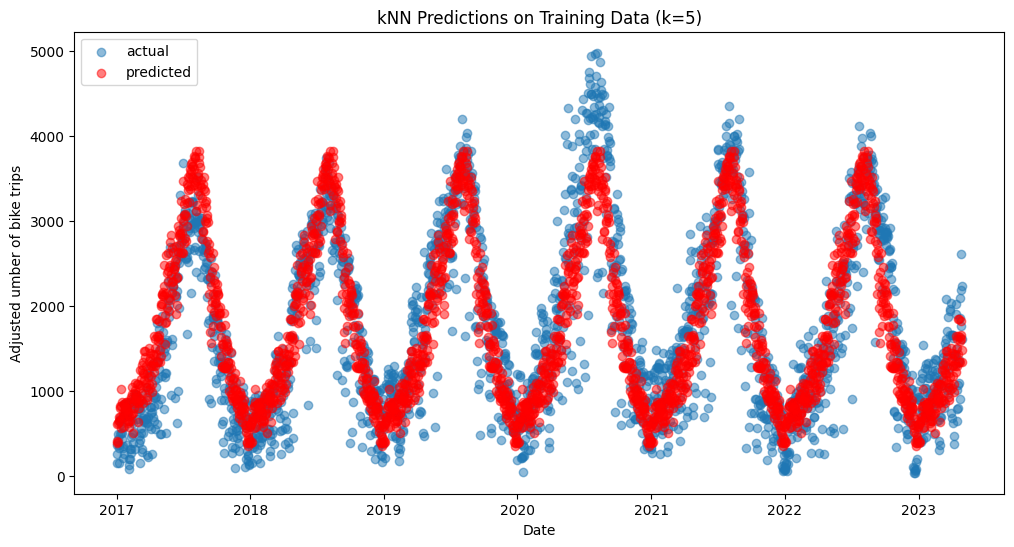

In [6]:
# Plot predictions on training data

y_train_pred = model.predict(X=d_train[['DoY']])

ax = plt.subplots(figsize=(12,6))[1]
ax.scatter(d_train['Date'], d_train['adj_num_trips'], alpha=0.5, label='actual')
ax.scatter(d_train['Date'], y_train_pred, alpha=0.5, c='r', label='predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted umber of bike trips')
ax.legend(loc='upper left')
ax.set_title('kNN Predictions on Training Data (k=5)')
plt.show()

In [7]:
# Find optimal k

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

kfold = KFold(n_splits=5, random_state=50, shuffle=True)

k_vals = [j for j in range(1,10)] + [10*j for j in range(1,21)]

i=0
RMSE_train = np.zeros((5,len(k_vals)))
RMSE_test = np.zeros((5,len(k_vals)))

for train_index, test_index in kfold.split(d_train):

    CV_train = d_train.iloc[train_index]
    CV_test = d_train.iloc[test_index]

    for j in range(len(k_vals)):
        model = KNeighborsRegressor(n_neighbors=k_vals[j], metric=dist)
        model.fit(X=CV_train[['DoY']], y=CV_train[['adj_num_trips']])

        pred_train = model.predict(X=CV_train[['DoY']])
        RMSE_train[i,j] = np.sqrt(mean_squared_error(y_true=CV_train[['adj_num_trips']], y_pred=pred_train))

        pred_test = model.predict(X=CV_test[['DoY']])
        RMSE_test[i,j] = np.sqrt(mean_squared_error(y_true=CV_test[['adj_num_trips']], y_pred=pred_test))

    i += 1

In [8]:
average_RMSE_train= RMSE_train.mean(axis=0)
average_RMSE_test = RMSE_test.mean(axis=0)

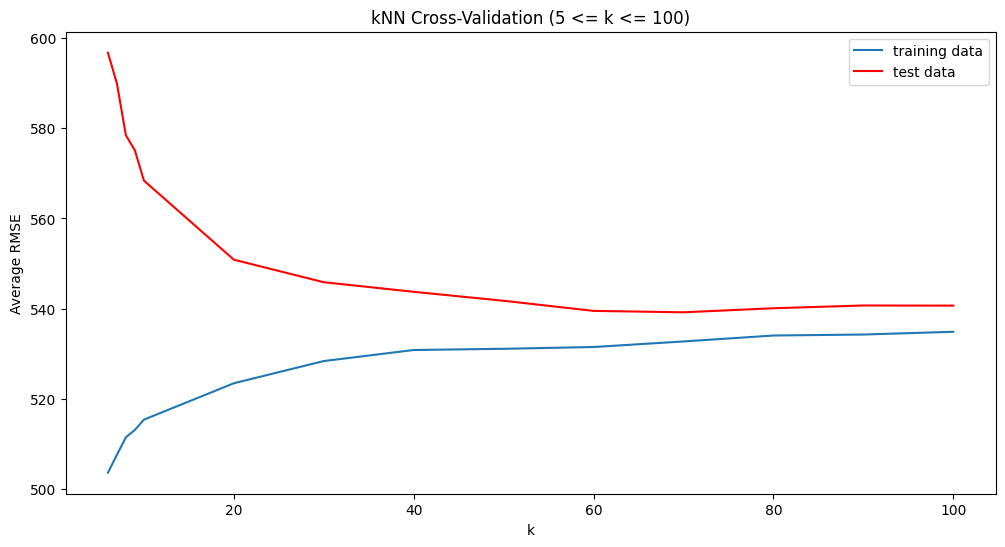

In [9]:
ax = plt.subplots(figsize=(12,6))[1]
ax.plot(k_vals[5:19], average_RMSE_train[5:19], label='training data')
ax.plot(k_vals[5:19], average_RMSE_test[5:19], c='r', label='test data')
ax.set_xlabel('k')
ax.set_ylabel('Average RMSE')
ax.set_title('kNN Cross-Validation (5 <= k <= 100)')
ax.legend(loc='upper right')
plt.show()

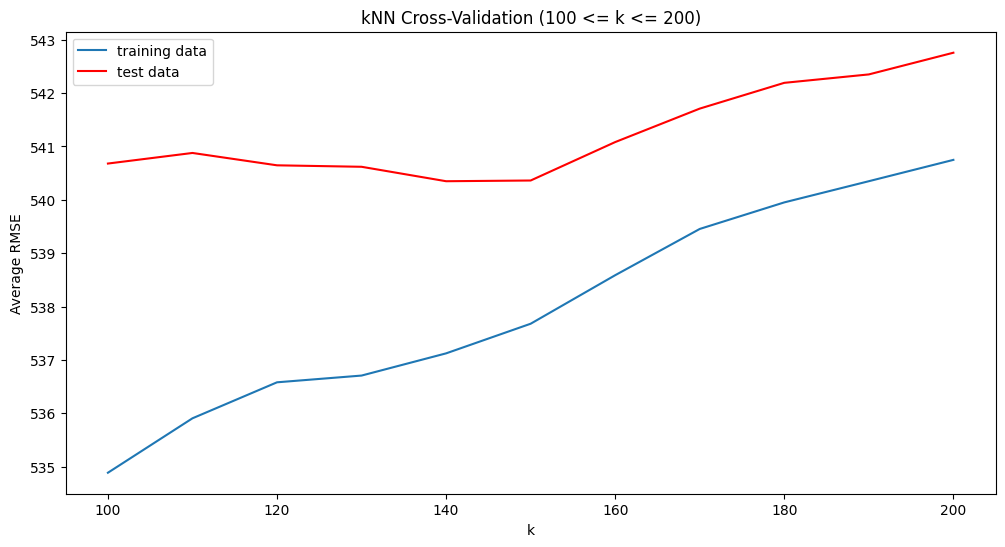

In [10]:
ax = plt.subplots(figsize=(12,6))[1]
ax.plot(k_vals[18:], average_RMSE_train[18:], label='training data')
ax.plot(k_vals[18:], average_RMSE_test[18:], c='r', label='test data')
ax.set_xlabel('k')
ax.set_ylabel('Average RMSE')
ax.set_title('kNN Cross-Validation (100 <= k <= 200)')
ax.legend(loc='upper left')
plt.show()

In [11]:
# Build kNN model with k=60

#from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=60, metric=dist)
model.fit(X=d_train[['DoY']], y=d_train[['adj_num_trips']]);

In [12]:
pred_train = model.predict(X=d_train[['DoY']])
RMSE_train = np.sqrt(mean_squared_error(y_true=d_train[['adj_num_trips']], y_pred=pred_train))
RMSE_train

531.8383093126798

In [13]:
pred_test = model.predict(X=d_test[['DoY']])
RMSE_test = np.sqrt(mean_squared_error(y_true=d_test[['adj_num_trips']], y_pred=pred_test))
RMSE_test

508.3427710990071